# Linear Regression using the Spotify Track Dataset

The dataset `spotify_track_data_top50_ph.zip` contains of all songs that appeared in the Spotify Regional Chart Top 50 for the Philippines from 2017. It is extracted from https://www.kaggle.com/jcacperalta/spotify-daily-top-200-ph#spotify_top200_tracks_ph.csv

Can you build a linear model to predict a song's popularity using the metrics provided as features?

The relevant metrics are 'popularity', 'danceability', 'energy','loudness','speechiness', 'acousticness', 'instrumentalness',
 'liveness', 'valence', and 'tempo'

In [117]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [118]:
df = pd.read_csv('data/spotify_daily_charts_tracks.csv')
df.head()

,track_id,track_name,artist_id,artist_name,album_id,duration,release_date,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,0ofbQMrRDsUaVKq2mGLEAb,Havana,4nDoRrQiYLoBzwC5BhVJzF,Camila Cabello,5chBPOVY2I0bG5V3igb5QL,216896,2017-08-03,4,0.768,0.517,7,-4.323,0,0.0312,0.18600,0.000038,0.1040,0.418,104.992
1,0tgVpDi06FyKpA1z0VMD4v,Perfect,6eUKZXaKkcviH0Ku9w2n3V,Ed Sheeran,3T4tUhGYeRNVUGevb0wThu,263400,2017-03-03,86,0.599,0.448,8,-6.312,1,0.0232,0.16300,0.000000,0.1060,0.168,95.050
2,3hBBKuWJfxlIlnd9QFoC8k,What Lovers Do (feat. SZA),04gDigrS5kc9YWfZHwBETP,Maroon 5,1Jmq5HEJeA9kNi2SgQul4U,199849,2017-11-03,4,0.795,0.615,5,-5.211,0,0.0671,0.07860,0.000003,0.0855,0.393,110.009
3,1mXVgsBdtIVeCLJnSnmtdV,Too Good At Goodbyes,2wY79sveU1sp5g7SokKOiI,Sam Smith,3TJz2UBNYJtlEly0sPeNrQ,201000,2017-11-03,81,0.681,0.372,5,-8.237,1,0.0432,0.64000,0.000000,0.1690,0.476,91.873
4,2ekn2ttSfGqwhhate0LSR0,New Rules,6M2wZ9GZgrQXHCFfjv46we,Dua Lipa,01sfgrNbnnPUEyz6GZYlt9,209320,2017-06-02,80,0.762,0.700,9,-6.021,0,0.0694,0.00261,0.000016,0.1530,0.608,116.073


In [119]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2292 entries, 0 to 2291
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   track_id          2292 non-null   object 
 1   track_name        2292 non-null   object 
 2   artist_id         2292 non-null   object 
 3   artist_name       2292 non-null   object 
 4   album_id          2292 non-null   object 
 5   duration          2292 non-null   int64  
 6   release_date      2292 non-null   object 
 7   popularity        2292 non-null   int64  
 8   danceability      2292 non-null   float64
 9   energy            2292 non-null   float64
 10  key               2292 non-null   int64  
 11  loudness          2292 non-null   float64
 12  mode              2292 non-null   int64  
 13  speechiness       2292 non-null   float64
 14  acousticness      2292 non-null   float64
 15  instrumentalness  2292 non-null   float64
 16  liveness          2292 non-null   float64


In [120]:
# remove null
df = df[~df['track_name'].isnull()]
len(df)

2292

In [121]:
#filter unnecessary fields
df =df[['popularity', 'danceability', 'energy',
       'loudness','speechiness', 'acousticness', 'instrumentalness',
       'liveness', 'valence', 'tempo']]
df.head()

,popularity,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,4,0.768,0.517,-4.323,0.0312,0.18600,0.000038,0.1040,0.418,104.992
1,86,0.599,0.448,-6.312,0.0232,0.16300,0.000000,0.1060,0.168,95.050
2,4,0.795,0.615,-5.211,0.0671,0.07860,0.000003,0.0855,0.393,110.009
3,81,0.681,0.372,-8.237,0.0432,0.64000,0.000000,0.1690,0.476,91.873
4,80,0.762,0.700,-6.021,0.0694,0.00261,0.000016,0.1530,0.608,116.073


### 1. Explore the dataset

In [122]:
#Make a table of distribution stats of song metrics using df.describe

df[['popularity', 'danceability', 'energy',
       'loudness','speechiness', 'acousticness', 'instrumentalness',
       'liveness', 'valence', 'tempo']].describe()

,popularity,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
count,2292.000000,2292.000000,2292.000000,2292.000000,2292.000000,2292.000000,2292.000000,2292.000000,2292.000000,2292.00000
mean,53.069372,0.635395,0.591876,-6.876896,0.083546,0.286942,0.009645,0.168288,0.455961,118.49658
std,28.040704,0.143064,0.190003,2.860197,0.083280,0.277537,0.069810,0.126592,0.213066,28.12539
min,0.000000,0.184000,0.054100,-24.250000,0.023200,0.000002,0.000000,0.021500,0.039800,52.57200
25%,44.000000,0.547000,0.461000,-8.291000,0.035800,0.053150,0.000000,0.092900,0.288750,96.97775
50%,63.000000,0.653000,0.602000,-6.428500,0.050950,0.186000,0.000000,0.118000,0.446500,116.00400
75%,73.000000,0.736000,0.738000,-4.876250,0.090550,0.468000,0.000017,0.200250,0.608000,136.05650
max,100.000000,0.953000,0.969000,0.175000,0.733000,0.979000,0.908000,0.955000,0.973000,207.47600


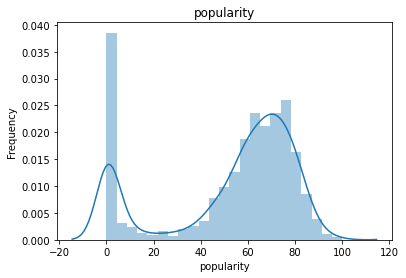

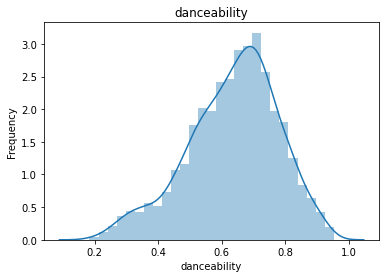

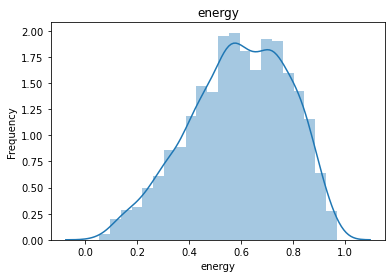

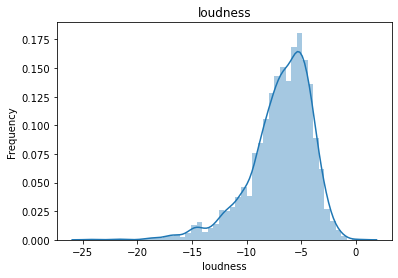

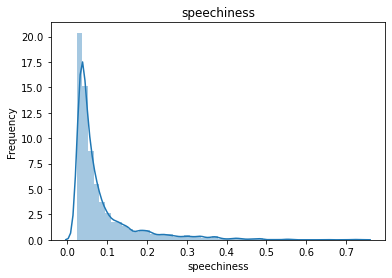

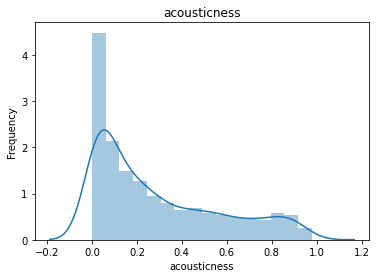

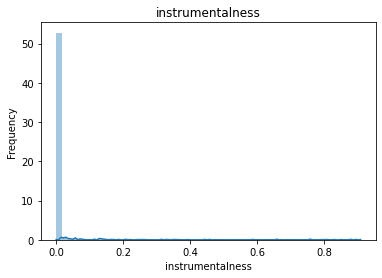

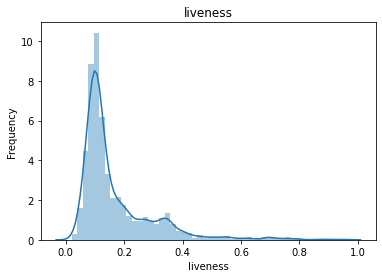

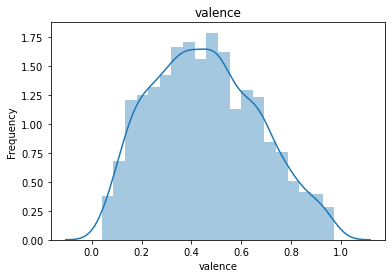

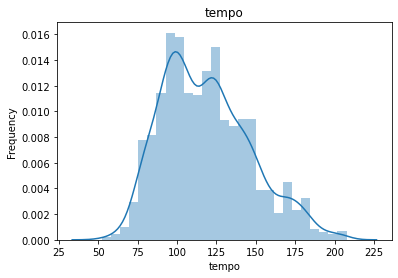

In [123]:
# Visualize histograms of each song metric
for col in ['popularity', 'danceability', 'energy','loudness', 'speechiness', 'acousticness', 'instrumentalness',
       'liveness', 'valence', 'tempo']:
    sns.distplot(df[col])
    plt.title(col)
    plt.ylabel('Frequency')
    plt.show()


### 2. Feature Engineering

Normalize loudness and tempo. 
>Q: Whats the best norm to use for each?


In [124]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

df['loudness'] = scaler.fit_transform(df[['loudness']])
df.head()

,popularity,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,4,0.768,0.517,0.815844,0.0312,0.18600,0.000038,0.1040,0.418,104.992
1,86,0.599,0.448,0.734411,0.0232,0.16300,0.000000,0.1060,0.168,95.050
2,4,0.795,0.615,0.779488,0.0671,0.07860,0.000003,0.0855,0.393,110.009
3,81,0.681,0.372,0.655599,0.0432,0.64000,0.000000,0.1690,0.476,91.873
4,80,0.762,0.700,0.746325,0.0694,0.00261,0.000016,0.1530,0.608,116.073


In [125]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

df['tempo'] = scaler.fit_transform(df[['tempo']])
df.head()

,popularity,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,4,0.768,0.517,0.815844,0.0312,0.18600,0.000038,0.1040,0.418,0.338403
1,86,0.599,0.448,0.734411,0.0232,0.16300,0.000000,0.1060,0.168,0.274221
2,4,0.795,0.615,0.779488,0.0671,0.07860,0.000003,0.0855,0.393,0.370791
3,81,0.681,0.372,0.655599,0.0432,0.64000,0.000000,0.1690,0.476,0.253712
4,80,0.762,0.700,0.746325,0.0694,0.00261,0.000016,0.1530,0.608,0.409938


Visualize the new loudness and tempo distributions

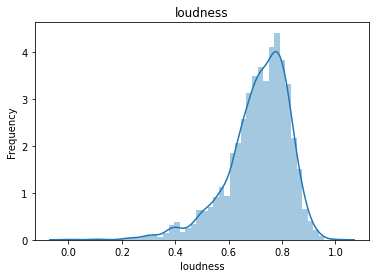

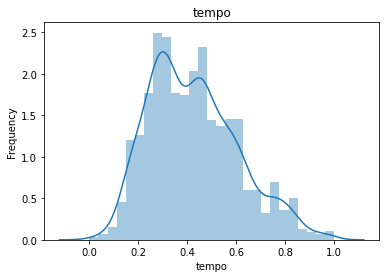

In [126]:
# Visualize histograms of each song metric
for col in ['loudness', 'tempo']:
    sns.distplot(df[col])
    plt.title(col)
    plt.ylabel('Frequency')
    plt.show()


### 3. Examine Features

To reduce variability, we could limit our analysis to only those songs that are sufficiently popular

In [127]:
#filter songs with above median popularity
df= df[df['popularity']>=61]
df = df.reset_index(drop=True)
len(df)

1243

Pick 3 features that you think would give you a good fit.
>Q: *Hypothesis*: Why do you think these 3 could be a good predictor for popularity?

Visualize the relationship between the features and the response using scatterplots

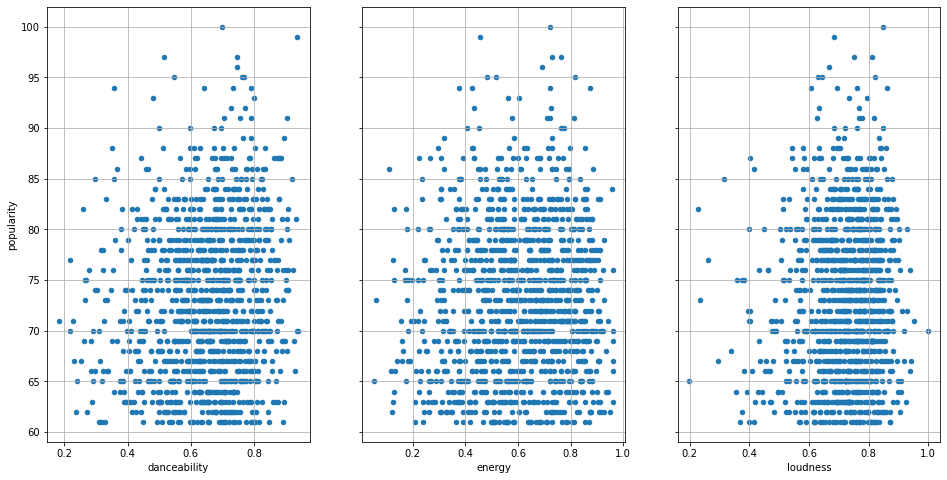

In [128]:

fig, axs = plt.subplots(1, 3, figsize=(16, 8), sharey=True)
df.plot(kind='scatter', x='danceability', y='popularity', ax=axs[0], grid=True)
df.plot(kind='scatter', x='energy', y='popularity', ax=axs[1], grid=True)
df.plot(kind='scatter', x='loudness', y='popularity', ax=axs[2], grid=True)

### 4. Fit the Model

Do the following steps for each of your selected features:

a. Determine best fit line coefficients

In [129]:
from sklearn.linear_model import LinearRegression

feature_cols = ['danceability']
X = df[feature_cols]
y = df['popularity']

model = LinearRegression(fit_intercept=True)
model.fit(X,y)

print('Model slope: %0.4f' % model.coef_[0])
print('Model intercept: %0.4f' % model.intercept_)


Model slope: 7.4918
Model intercept: 68.1444


b. Obtain the R2 for the fit

In [130]:
print('Model R2: %0.4f' % model.score(X,y))

Model R2: 0.0190


>Q: Interpret the model coefficients. What does the R2 value tell you about the fitted model?

An increase of 0.1 in danceability will result to an increase of popularity by 0.7 points. 
But based from the R2, this is a very bad fit and so we hold back from this interpretation.

c. Compute for RMSE and MAE

In [131]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

#define RMSE function
def RMSE(model, X, y):
    predicted = model.predict(X)
    rmse = np.sqrt(mean_squared_error(y, predicted))
    return rmse
  
#define MAE function
def MAE(model, X, y):
    predicted = model.predict(X)
    mae = mean_absolute_error(y, predicted)
    return mae

In [132]:
print('Model RMSE: %0.4f' % RMSE(model,X,y))
print('Model MAE: %0.4f' % MAE(model,X,y))

Model RMSE: 7.4289
Model MAE: 6.1369


>Q: What does the RMSE and MAE tell you about the model performance?

The model's predicted popularity is more or less expected to be off by 8.22 points (conservative) or 6.9 points (equal weighting) for all songs considered

d. Check for outliers and determine if removing them could result to a better fit

In [133]:
q1 = df['popularity'].quantile(0.25)
q3 =  df['popularity'].quantile(0.75)
IQR = q3 -q1

outliers = df[(df['popularity']<(q1-1.5*IQR))&(df['popularity']>(q3+1.5*IQR))]['popularity']
outliers

Series([], Name: popularity, dtype: int64)

### 5. Using multiple features

Will using all 3 of your chosen features result into a better fit? Repeat the procedure in 4 and see if the metrics improve.
If it did improve, do you think its enough to make the model more credible?

In [134]:
# create X and y
feature_cols = ['danceability', 'energy', 'loudness']
X = df[feature_cols]
y = df['popularity']

lm = LinearRegression()
lm.fit(X, y)

# print intercept and coefficients
print(lm.intercept_)
# pair the feature names with the coefficients
print(list(zip(feature_cols, lm.coef_)))

66.26027960414726
[('danceability', 7.200049159143291), ('energy', -1.5606663046900953), ('loudness', 4.164642579719314)]


In [135]:
# calculate the R-squared
lm.score(X, y)

0.02047729386078978

### 6. Using k-fold cross validation
We could further investigate on the models predictive performance using k-fold cross validation.
What does folding reveal about the linear model you built?

- For the model you built in (5), try the validation procedure for k=5 and k=10



In [136]:
X = X.to_numpy()
Y = y.to_numpy()

In [137]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=5, random_state=None, shuffle=False)


for train_index, test_index in kf.split(X):
    #print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X[train_index], X[test_index]
    Y_train, Y_test = Y[train_index], Y[test_index]
    #print(np.shape(X_test), np.shape(Y_test))
    
    #fit using training data
    lin_model = LinearRegression()
    lin_model.fit(X_train, Y_train)
    
    #evaluate fit of train data
    print('train: R2=%0.2f '% lin_model.score(X_train, Y_train))

    #evaluate using test data
    print('test: RMSE=%0.2f, R2=%0.2f' % (RMSE(lin_model, X_test, Y_test), lin_model.score(X_test,Y_test)))

train: R2=0.02 
test: RMSE=6.72, R2=-0.07
train: R2=0.02 
test: RMSE=6.71, R2=-0.06
train: R2=0.02 
test: RMSE=6.96, R2=0.00
train: R2=0.02 
test: RMSE=7.64, R2=-0.04
train: R2=0.02 
test: RMSE=9.26, R2=-0.06


All training sets show poor fit. Some test sets produced relatively better fits, but this is only local to the fold since RMSE remains high.

## Day Deliverable
### A deeper look into linear regression
1. (Individual) Pick a set of (a) 3 (b) 4 and (c) all audio features as predictors and repeat steps 3-6. 


2. (If you finish 1 ahead of time) *Classification using Linear Regression* 

     Let a **popular track** be defined as a track with current popularity > 60. 
    
    (a) Based on this, create a column `is_popular` using encoding methods.  
    
    (b) Configure and fit a linear regression model classificator using the audio features as predictors to predict if a track is popular or not.
    
    (c) Validate tuned model using 5-fold cross validation
    
    
3. (If you finish 2 ahead of time) *Classification using Logistic Regression *
    
    Repeat all steps in (2) but use Logistic Regression instead. Did this result into a better predicting model?

In [138]:
#filter songs with above median popularity
# df['is_popular']= 
# df['popularity'].apply(lambda x: 1 if x > 61 else 0)
df= df[df['popularity']>=61]
df = df.reset_index(drop=True)
len(df)

1243

In [139]:
corr = df.corr()

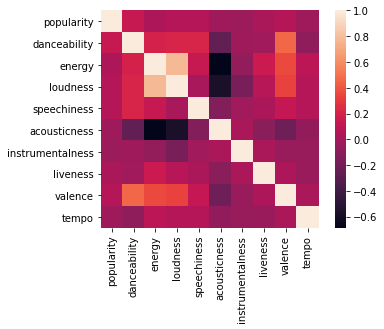

In [140]:
sns.heatmap(corr, square=True)

In [142]:
# create X and y
feature_cols = ['acousticness', 'valence', 'energy']
X = df[feature_cols]
y = df['popularity']
# X = df.drop(['is_popular', 
#             'popularity'], 1)
# y = df['is_popular']

lm = LinearRegression()
lm.fit(X, y)

# print intercept and coefficients
print(lm.intercept_)
# pair the feature names with the coefficients
print(list(zip(feature_cols, lm.coef_)))

71.61922262292725
[('acousticness', 0.07051620544220859), ('valence', 2.2923088082572995), ('energy', 0.4948735957401875)]


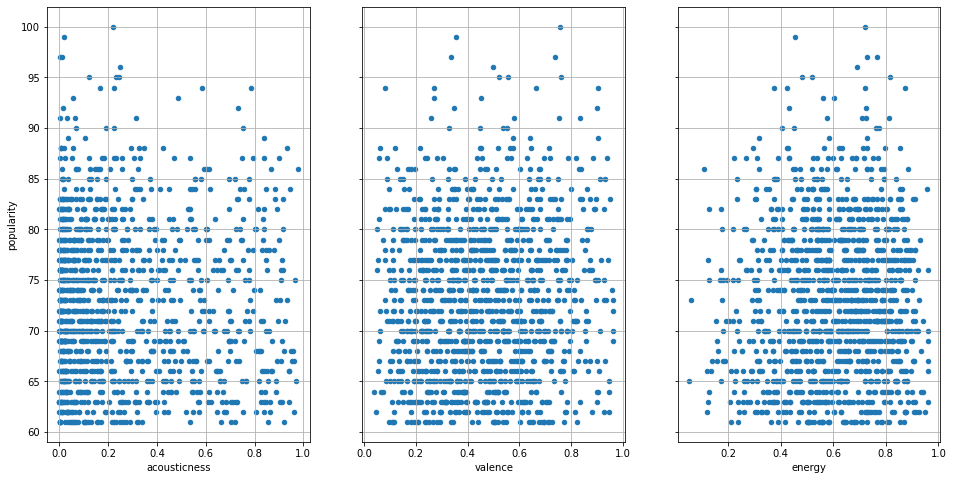

In [143]:
# fig, axs = plt.subplots(1, 3, figsize=(16, 8), sharey=True)
# df.plot(kind='scatter', x='acousticness', y='popularity', ax=axs[0], grid=True)
# df.plot(kind='scatter', x='energy', y='popularity', ax=axs[1], grid=True)
# df.plot(kind='scatter', x='danceability', y='popularity', ax=axs[2], grid=True)

fig, axs = plt.subplots(1, 3, figsize=(16, 8), sharey=True)
for col, i in zip(feature_cols, range(len(feature_cols))):
    df.plot(kind='scatter', x=col, y='popularity', ax=axs[i], grid=True)

In [ ]:
# from sklearn.linear_model import LinearRegression

# feature_cols = ['danceability']
# X = df[feature_cols]
# y = df['popularity']

# model = LinearRegression(fit_intercept=True)
# model.fit(X,y)

# print('Model slope: %0.4f' % model.coef_[0])
# print('Model intercept: %0.4f' % model.intercept_)


In [145]:
print('Model R2: %0.4f' % lm.score(X,y))

Model R2: 0.0049


In [146]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

#define RMSE function
def RMSE(model, X, y):
    predicted = model.predict(X)
    rmse = np.sqrt(mean_squared_error(y, predicted))
    return rmse
  
#define MAE function
def MAE(model, X, y):
    predicted = model.predict(X)
    mae = mean_absolute_error(y, predicted)
    return mae

In [ ]:
print('Model RMSE: %0.4f' % RMSE(lm,X,y))
print('Model MAE: %0.4f' % MAE(lm,X,y))

In [ ]:
q1 = df['is_popular'].quantile(0.25)
q3 =  df['is_popular'].quantile(0.75)
IQR = q3 - q1

outliers = df[(df['is_popular']<(q1-1.5*IQR))&(df['is_popular']>(q3+1.5*IQR))]['is_popular']
outliers

66.71093803897011
[('acousticness', 1.1543836179694773), ('energy', 1.2622077232846762), ('danceability', 7.754726964762858), ('liveness', 1.151995279186919)]
Model R2: 0.0203
Model RMSE: 7.4240
Model MAE: 6.1388


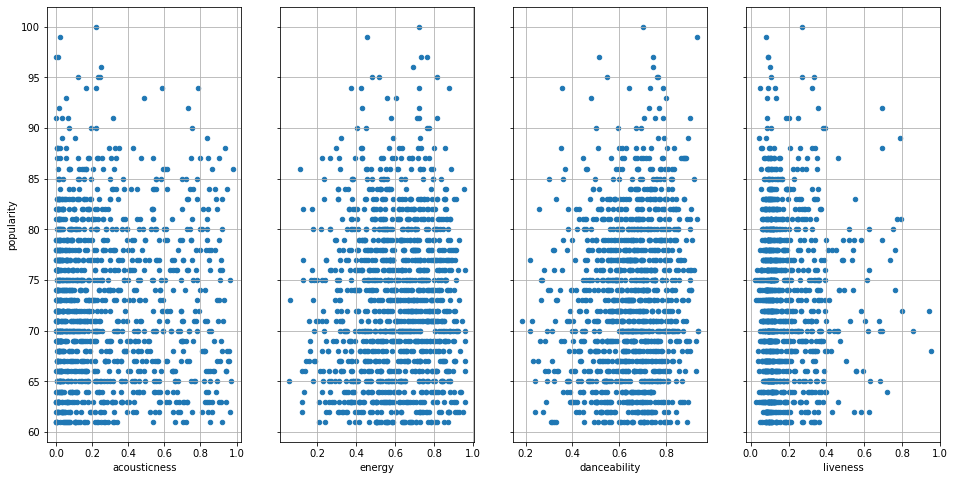

In [162]:
feature_cols_4 = ['acousticness', 'energy', 'danceability', 'liveness']

X = df[feature_cols_4]
y = df['popularity']

lm = LinearRegression()
lm.fit(X,y)

# print intercept and coefficients
print(lm.intercept_)
# pair the feature names with the coefficients
print(list(zip(feature_cols_4, lm.coef_)))

fig, axs = plt.subplots(1, len(feature_cols_4), figsize=(16, 8), sharey=True)
for col, i in zip(feature_cols_4, range(len(feature_cols_4))):
    df.plot(kind='scatter', x=col, y='popularity', ax=axs[i], grid=True)

print('Model R2: %0.4f' % lm.score(X,y))

print('Model RMSE: %0.4f' % RMSE(lm,X,y))
print('Model MAE: %0.4f' % MAE(lm,X,y))

In [163]:
X = X.to_numpy()
Y = y.to_numpy()

In [164]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=5, random_state=None, shuffle=False)


for train_index, test_index in kf.split(X):
    #print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X[train_index], X[test_index]
    Y_train, Y_test = Y[train_index], Y[test_index]
    #print(np.shape(X_test), np.shape(Y_test))
    
    #fit using training data
    lin_model = LinearRegression()
    lin_model.fit(X_train, Y_train)
    
    #evaluate fit of train data
    print('train: R2=%0.2f '% lin_model.score(X_train, Y_train))

    #evaluate using test data
    print('test: RMSE=%0.2f, R2=%0.2f' % (RMSE(lin_model, X_test, Y_test), lin_model.score(X_test,Y_test)))

train: R2=0.02 
test: RMSE=6.71, R2=-0.07
train: R2=0.02 
test: RMSE=6.70, R2=-0.05
train: R2=0.02 
test: RMSE=6.98, R2=-0.00
train: R2=0.02 
test: RMSE=7.70, R2=-0.05
train: R2=0.02 
test: RMSE=9.23, R2=-0.05


In [178]:
# 2. (If you finish 1 ahead of time) *Classification using Linear Regression* 

#      Let a **popular track** be defined as a track with current popularity > 60. 
    
#     (a) Based on this, create a column `is_popular` using encoding methods.  
    
#     (b) Configure and fit a linear regression model classificator using the audio features as predictors to predict if a track is popular or not.
    
#     (c) Validate tuned model using 5-fold cross validation

df_old = pd.read_csv('data/spotify_daily_charts_tracks.csv')

print(df_old.head())

df_old['is_popular'] = df_old['popularity'].apply(lambda x: 1 if x > 61 else 0)

lin = LinearRegression()

X = df_old.drop(['track_id', 'track_name', 'artist_id', 'artist_name', 'popularity', 'release_date', 'album_id', 'is_popular'], axis = 1)
y = df_old['is_popular']

lin.fit(X, y)

print('\nScore: ', lin.score(X,y))

from sklearn.model_selection import KFold
kf = KFold(n_splits=5, random_state=None, shuffle=False)

X = X.to_numpy()
Y = y.to_numpy()

for train_index, test_index in kf.split(X):
    #print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X[train_index], X[test_index]
    Y_train, Y_test = Y[train_index], Y[test_index]
    #print(np.shape(X_test), np.shape(Y_test))
    
    #fit using training data
    lin_model = LinearRegression()
    lin_model.fit(X_train, Y_train)
    
    #evaluate fit of train data
    print('train: R2=%0.2f '% lin_model.score(X_train, Y_train))

    #evaluate using test data
    print('test: RMSE=%0.2f, R2=%0.2f' % (RMSE(lin_model, X_test, Y_test), lin_model.score(X_test,Y_test)))

                 track_id                  track_name               artist_id  \
0  0ofbQMrRDsUaVKq2mGLEAb                      Havana  4nDoRrQiYLoBzwC5BhVJzF   
1  0tgVpDi06FyKpA1z0VMD4v                     Perfect  6eUKZXaKkcviH0Ku9w2n3V   
2  3hBBKuWJfxlIlnd9QFoC8k  What Lovers Do (feat. SZA)  04gDigrS5kc9YWfZHwBETP   
3  1mXVgsBdtIVeCLJnSnmtdV        Too Good At Goodbyes  2wY79sveU1sp5g7SokKOiI   
4  2ekn2ttSfGqwhhate0LSR0                   New Rules  6M2wZ9GZgrQXHCFfjv46we   

      artist_name                album_id  duration release_date  popularity  \
0  Camila Cabello  5chBPOVY2I0bG5V3igb5QL    216896   2017-08-03           4   
1      Ed Sheeran  3T4tUhGYeRNVUGevb0wThu    263400   2017-03-03          86   
2        Maroon 5  1Jmq5HEJeA9kNi2SgQul4U    199849   2017-11-03           4   
3       Sam Smith  3TJz2UBNYJtlEly0sPeNrQ    201000   2017-11-03          81   
4        Dua Lipa  01sfgrNbnnPUEyz6GZYlt9    209320   2017-06-02          80   

   danceability  energy  key  lo

In [184]:
# 3. (If you finish 2 ahead of time) *Classification using Logistic Regression *
    
#     Repeat all steps in (2) but use Logistic Regression instead. Did this result into a better predicting model?

from sklearn.linear_model import LogisticRegression 

log_model = LogisticRegression()

# X = df_old.drop(['track_id', 'track_name', 'artist_id', 'artist_name', 'popularity', 'release_date', 'album_id', 'is_popular'], axis = 1)
# y = df_old['is_popular']

# from sklearn.preprocessing import MinMaxScaler
# scaler = MinMaxScaler()

# df['danceability'] = scaler.fit_transform(df[['danceability']])
# df['energy'] = scaler.fit_transform(df[['energy']])
# df['loudness'] = scaler.fit_transform(df[['loudness']])
# df['speechiness'] = scaler.fit_transform(df[['speechiness']])
# df['acousticness'] = scaler.fit_transform(df[['acousticness']])
# df['instrumentalness'] = scaler.fit_transform(df[['instrumentalness']])
# df['liveness'] = scaler.fit_transform(df[['liveness']])
# df['valence'] = scaler.fit_transform(df[['valence']])
# df['tempo'] = scaler.fit_transform(df[['tempo']])
# df.head()

log_model.fit(X, y)

print('\nScore: ', log_model.score(X,y))

from sklearn.model_selection import KFold
kf = KFold(n_splits=5, random_state=None, shuffle=False)

for train_index, test_index in kf.split(X):
    #print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X[train_index], X[test_index]
    Y_train, Y_test = Y[train_index], Y[test_index]
    #print(np.shape(X_test), np.shape(Y_test))
    
    #fit using training data
    log_model = LogisticRegression()
    log_model.fit(X_train, Y_train)
    
    #evaluate fit of train data
    print('train: R2=%0.2f '% log_model.score(X_train, Y_train))

    #evaluate using test data
    print('test: RMSE=%0.2f, R2=%0.2f' % (RMSE(log_model, X_test, Y_test), log_model.score(X_test,Y_test)))


Score:  0.5414485165794066
train: R2=0.55 
test: RMSE=0.76, R2=0.42
train: R2=0.56 
test: RMSE=0.72, R2=0.48
train: R2=0.55 
test: RMSE=0.74, R2=0.45
train: R2=0.54 
test: RMSE=0.68, R2=0.53
train: R2=0.51 
test: RMSE=0.82, R2=0.32
